In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Read the dataset in the csv file from the URL

In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

Add your code below following the instructions given in the course to complete the peer graded assignment

In [4]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


For the "Median value of owner-occupied homes" provide a boxplot

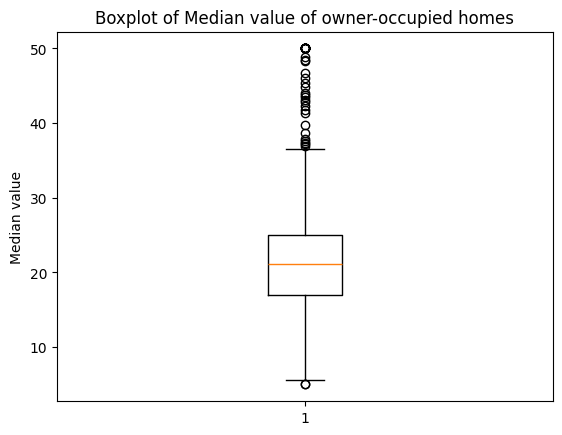

In [5]:
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.ylabel('Median value')
pyplot.show()

<Axes: xlabel='MEDV'>

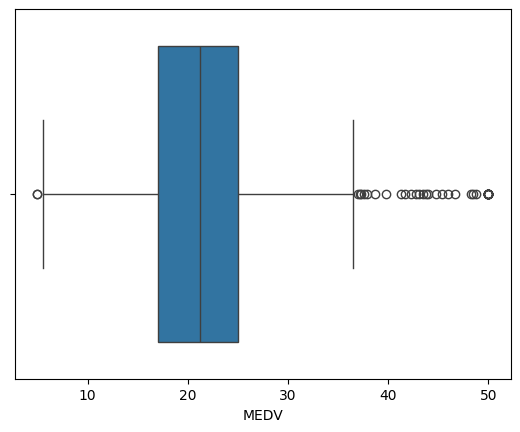

In [6]:
sns.boxplot(x=boston_df['MEDV'])

Provide a bar plot for the Charles river variable

In [7]:
value_count=boston_df['CHAS'].value_counts()
value_count

,count
CHAS,
0.0,471
1.0,35


Text(0.5, 0, 'CHAS o/1')

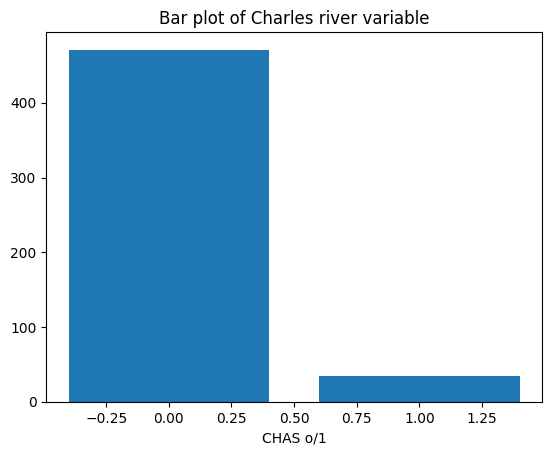

In [8]:
pyplot.bar(value_count.index,value_count.values)
pyplot.title('Bar plot of Charles river variable')
pyplot.xlabel('CHAS o/1')

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0.5, 1.0, 'Boxplot of MEDV vs Age')

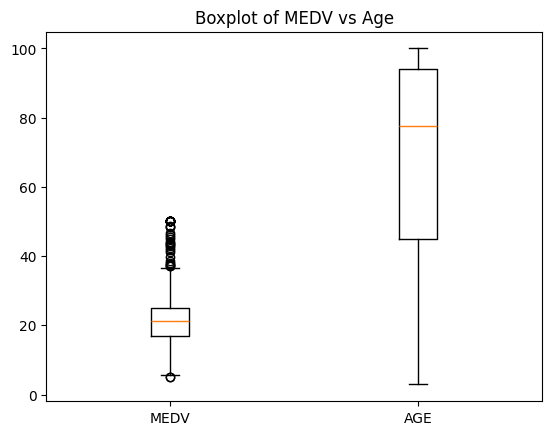

In [11]:
data = [boston_df['MEDV'],boston_df['AGE']]
pyplot.boxplot(data, labels=['MEDV','AGE'])
pyplot.title('Boxplot of MEDV vs Age')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'non-retail business acres per town')

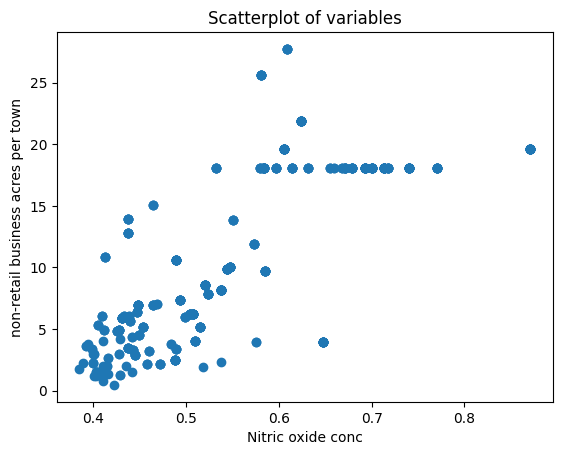

In [12]:
pyplot.scatter(boston_df['NOX'],boston_df['INDUS'])
pyplot.title('Scatterplot of variables')
pyplot.xlabel('Nitric oxide conc')
pyplot.ylabel('non-retail business acres per town')

Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram of Pupil:Teacher')

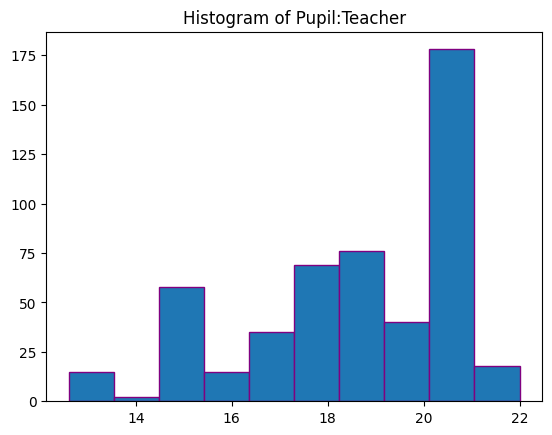

In [13]:
pyplot.hist(boston_df['PTRATIO'],bins=10,edgecolor='purple')
pyplot.title('Histogram of Pupil:Teacher')

In [14]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy import stats

# Split data based on CHAS (1 if bounded by river, 0 otherwise)
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(chas_1, chas_0, equal_var=False)

# Output the result
t_stat, p_value

(3.113291312794837, 0.0035671700981375174)

In [20]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Perform ANOVA test
f_stat, p_value = stats.f_oneway(
    boston_df[boston_df['age_group'] == '<= 35 years']['MEDV'],
    boston_df[boston_df['age_group'] == '35-70 years']['MEDV'],
    boston_df[boston_df['age_group'] == '> 70 years']['MEDV']
)

# Output the result
f_stat, p_value

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


(nan, nan)

In [21]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Perform Pearson correlation test
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the result
corr, p_value

(0.7636514469209151, 7.913361061239527e-98)

In [22]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import statsmodels.api as sm

# Independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable (for intercept in regression)
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Output the result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        16:35:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""